In [1]:
import pandas as pd
from config import *
from matplotlib import pyplot as plt
plt.rcParams["legend.fontsize"] = 'large'
plt.rcParams["font.family"] = 'Times New Roman'

In [2]:
cols = ["frequence", "transmittance"]
origin = pd.read_csv("trans/原参数透射.csv", skiprows=5, names=cols)
target = pd.read_csv("trans/调参透射.csv", skiprows=5, names=cols)
conbination = pd.read_csv("trans/组合透射.csv", skiprows=5, names=cols)


In [3]:
def clip_to_target(df, target=1.0):
    df["transmittance"] = df["transmittance"].clip(0, target)
    return df

In [4]:
origin = clip_to_target(origin)
target = clip_to_target(target)
conbination = clip_to_target(conbination)

In [7]:
def draw_trans(serise, name):
    fig, ax = plt.subplots()
    plt.ylim(0, 6500)
    plt.xlim(0, max(serise.transmittance))
    ax.set_xlabel("Transmittance", fontsize=fontsize * 1.5)
    # ax.set_ylabel("Frequence (Hz)", fontsize=fontsize * 1.5)
    ax.tick_params(axis='both', labelsize=ticksize * 1.5)
    ax.set_yticks([])
    ax.plot(serise.transmittance, serise.frequence, label="transmittance", color=colors["blue"])
    plt.tight_layout()
    plt.savefig(f"figures/{name}.pdf")

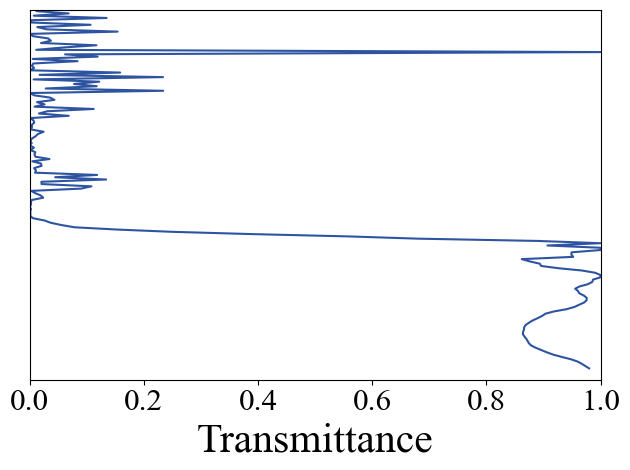

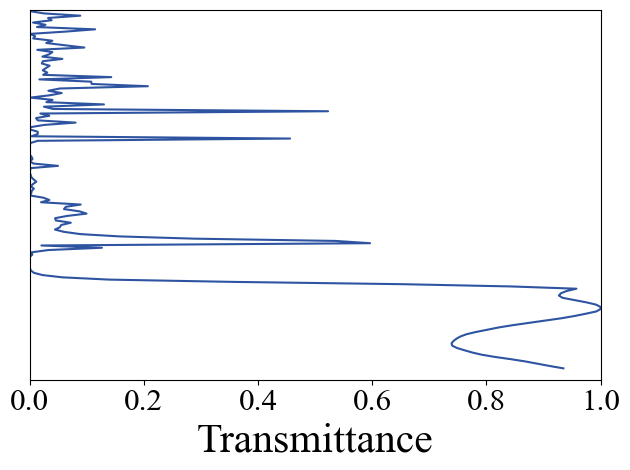

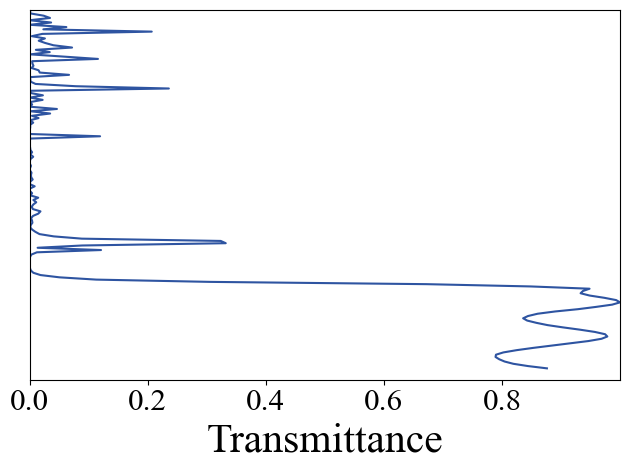

In [8]:
draw_trans(origin, "fig4b_origin_trans")
draw_trans(target, "fig4d_target_trans")
draw_trans(conbination, "fig4e_comb_trans")